<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:150%; font-family:Arial; background-color:#Black; overflow:hidden"><b> Mushroom Mystery: Edible or Poisonous? </b></div>

![mushrooms](https://img.freepik.com/free-vector/different-types-mushrooms_1308-86573.jpg?t=st=1722544742~exp=1722548342~hmac=afb99520b515d7ae34bf06b713fd9b50277d5d432b6f9b455d53c475f48bf5ee&w=2000)

<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto; background-color: #black;">
    <p style="font-size: 20px; font-family: 'Georgia'; line-height: 1.5em;">
    Imagine you're out in the forest, and you come across a beautiful mushroom. You might wonder, "Is it safe to eat?" In this project, we're using data science to help answer that question. The goal is to predict whether a mushroom is edible or poisonous based on its physical features, such as color, shape, and texture.
    </p>
    <p style="font-size: 20px; font-family: 'Georgia'; line-height: 1.5em;">
    To tackle this challenge, we'll be analyzing a special dataset. This dataset was created by a deep learning model that studied thousands of mushrooms. While the data is similar to a well-known mushroom dataset, there are some differences that make this project unique.
    </p>
    <p style="font-size: 20px; font-family: 'Georgia'; line-height: 1.5em;">
    Our approach will include carefully exploring the data (a process known as Exploratory Data Analysis or EDA) and cleaning it up to make sure our predictions are as accurate as possible. Through this project, we'll uncover patterns in the data and use them to build a model that can help identify which mushrooms are safe to eat and which should be avoided.
    </p>
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:Black; margin:0; font-size:110%; font-family:Arial; background-color:#Black; overflow:hidden"><b> Table of Contents </b></div>

- <a href="#libraries">1. Importing Required Libraries</a>
- <a href="#data">2. Reading and Understanding our Data</a>
- <a href="#clean">3. Data Cleaning</a>
    - <a href="#infreq">3.1. Deal with Infrequent Categories</a> 
    - <a href="#numerical">3.2. Fill Missing Values in Numerical Columns</a> 
    - <a href="#impute">3.3. Impute Categorical Missing Values</a> 
    - <a href="#dup">3.4. Drop Duplicates</a> 
- <a href="#eda">4. Exploratory Data Analysis</a>
    - <a href="#num">4.1. Distribution of Numerical Features</a> 
    - <a href="#cat">4.2. Distribution of Categorical Features</a> 
    - <a href="#corrnum">4.3. Exploring Correlations between Numerical Features</a> 
    - <a href="#corrcat">4.4. Exploring Correlations between Categorical Features</a> 
    - <a href="#outliers">4.5. Exploring Outliers</a> 
    - <a href="#target">4.6. Distribution of a Target Variable</a> 
- <a href="#ml">5. Data Preprocessing and Data Modeling</a>
- <a href="#sub">6. Predictions and Submission</a>

<a id="libraries"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:110%; font-family:Arial; background-color:#black; overflow:hidden"><b> 1. Importing Required Libraries </b></div>



In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import IsolationForest

palette = sns.color_palette("Spectral", n_colors=13) 
sns.set_theme(context='notebook', palette=palette, style='darkgrid')
rs = 58

<a id="data"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:110%; font-family:Arial; background-color:#black; overflow:hidden"><b> 2. Reading and Understanding our Data </b></div>



In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')

print("First 5 rows of our dataset:")
df_train.head()

First 5 rows of our dataset:


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [3]:
print(f"There are {df_train.shape[1]} columns and {df_train.shape[0]} rows in the train dataset.")

There are 22 columns and 3116945 rows in the train dataset.


In [4]:
print("Column names and data type of each column:")
df_train.dtypes

Column names and data type of each column:


id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [5]:
print("There are {} duplicates in the dataset.".format(df_train.duplicated().sum()))

There are 0 duplicates in the dataset.


In [6]:
print("Checking for missing values in each column:")
print(df_train.isnull().sum())

Checking for missing values in each column:
id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64


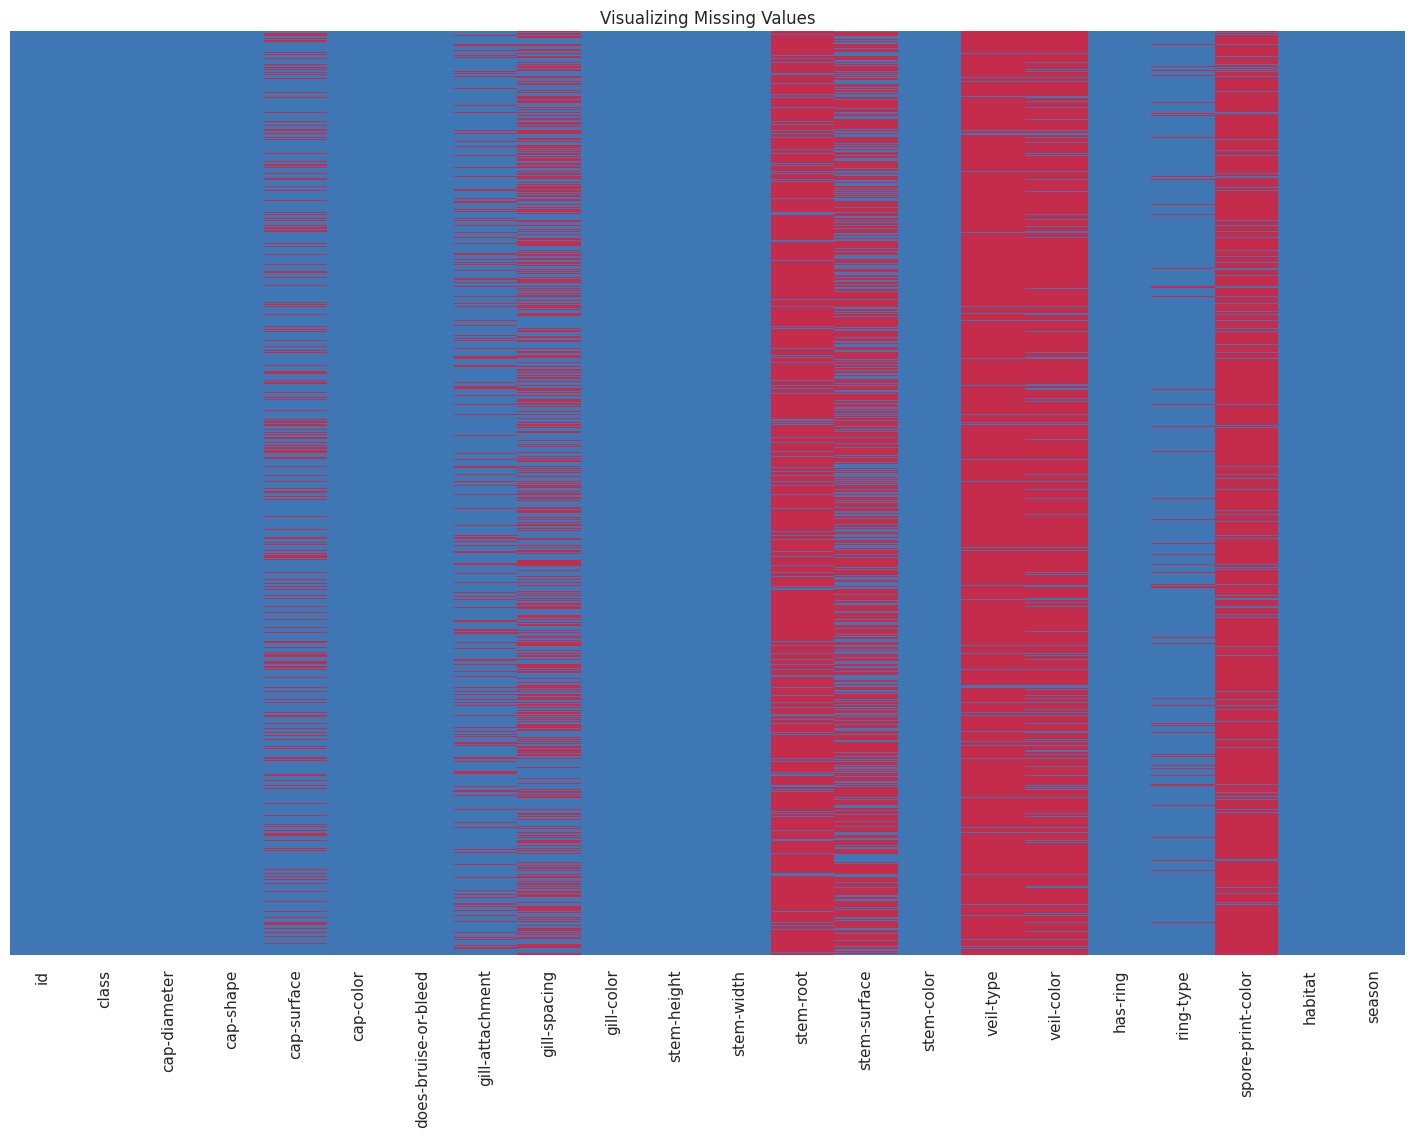

In [7]:
plt.figure(figsize=(18,12))
plt.title("Visualizing Missing Values")
sns.heatmap(df_train.isnull(), cbar=False, cmap=sns.color_palette("Spectral_r", n_colors=13), yticklabels=False);

<a id="clean"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:110%; font-family:Arial; background-color:#black; overflow:hidden"><b> 3. Data Cleaning </b></div>



<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto;">
    <p style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
    We'll begin by cleaning and preparing our two tables, `df_train` and `df_test`, for analysis. This involves removing unnecessary columns, such as the 'id' column, which isn't needed for our analysis. We'll also identify the data types in each column, separating them into lists of numerical columns, categorical columns, and the target column.
    </p>
</div>

In [8]:
# Create copies of the original DataFrames
df_train_cleaned = df_train.copy()
df_test_cleaned = df_test.copy()

# Drop 'id' column
df_train_cleaned = df_train_cleaned.drop(['id'], axis=1)

# Define the target column
target_column = 'class'

# Select categorical columns, excluding the target column
categorical_columns = df_train_cleaned.select_dtypes(include=['object']).columns.drop(target_column)

# Select numerical columns, excluding the target column if it's numerical
numerical_columns = df_train_cleaned.select_dtypes(exclude=['object']).columns.drop(target_column, errors='ignore')

# Print out the lists of columns
print("Target Column:", target_column)
print("\nCategorical Columns:", categorical_columns.tolist())
print("\nNumerical Columns:", numerical_columns.tolist())

Target Column: class

Categorical Columns: ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

Numerical Columns: ['cap-diameter', 'stem-height', 'stem-width']


<a id="infreq"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:170%; font-family:Arial; background-color:#black; overflow:hidden"><b> 3.1. Deal with Infrequent Categories</b></div>

In [9]:
for column in categorical_columns:
    num_unique = df_train_cleaned[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

'cap-shape' has 74 unique categories.
'cap-surface' has 83 unique categories.
'cap-color' has 78 unique categories.
'does-bruise-or-bleed' has 26 unique categories.
'gill-attachment' has 78 unique categories.
'gill-spacing' has 48 unique categories.
'gill-color' has 63 unique categories.
'stem-root' has 38 unique categories.
'stem-surface' has 60 unique categories.
'stem-color' has 59 unique categories.
'veil-type' has 22 unique categories.
'veil-color' has 24 unique categories.
'has-ring' has 23 unique categories.
'ring-type' has 40 unique categories.
'spore-print-color' has 32 unique categories.
'habitat' has 52 unique categories.
'season' has 4 unique categories.


In [10]:
# Print top 10 unique value counts for each categorical column
for column in categorical_columns:
    print(f"\nTop value counts in '{column}':\n{df_train_cleaned[column].value_counts().head(10)}")


Top value counts in 'cap-shape':
cap-shape
x    1436026
f     676238
s     365146
b     318646
o     108835
p     106967
c     104520
d         65
e         60
n         41
Name: count, dtype: int64

Top value counts in 'cap-surface':
cap-surface
t    460777
s    384970
y    327826
h    284460
g    263729
d    206832
k    128875
e    119712
i    113440
w    109840
Name: count, dtype: int64

Top value counts in 'cap-color':
cap-color
n    1359542
y     386627
w     379442
g     210825
e     197290
o     178847
p      91838
r      78236
u      73172
b      61313
Name: count, dtype: int64

Top value counts in 'does-bruise-or-bleed':
does-bruise-or-bleed
f    2569743
t     547085
w         14
c         11
h          9
b          7
y          7
a          7
x          7
s          6
Name: count, dtype: int64

Top value counts in 'gill-attachment':
gill-attachment
a    646034
d    589236
x    360878
e    301858
s    295439
p    279110
f    119953
c        74
u        56
w        37
Name: co

<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto;">
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        We encounter a challenge: some categories don't show up very often in our data. This makes it hard to work with them. To fix this, we'll group these rare categories together into a new category called "Unknown".
    </ul>
</div>

In [11]:
# Define a function to identify and replace infrequent categories
def replace_infrequent_categories(df, column, threshold=70):
    value_counts = df[column].value_counts()
    infrequent = value_counts[value_counts <= threshold].index
    df[column] = df[column].apply(lambda x: "Unknown" if x in infrequent else x)
    return df

# Handle invalid values and infrequent categories for all categorical columns
for col in categorical_columns:
    df_train_cleaned = replace_infrequent_categories(df_train_cleaned, col)
    df_test_cleaned = replace_infrequent_categories(df_test_cleaned, col)

# Print out number of unique columns after a replacement
print("After a replacement:")
for column in categorical_columns:
    num_unique = df_train_cleaned[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

After a replacement:
'cap-shape' has 8 unique categories.
'cap-surface' has 14 unique categories.
'cap-color' has 13 unique categories.
'does-bruise-or-bleed' has 3 unique categories.
'gill-attachment' has 9 unique categories.
'gill-spacing' has 4 unique categories.
'gill-color' has 13 unique categories.
'stem-root' has 6 unique categories.
'stem-surface' has 9 unique categories.
'stem-color' has 14 unique categories.
'veil-type' has 2 unique categories.
'veil-color' has 7 unique categories.
'has-ring' has 3 unique categories.
'ring-type' has 10 unique categories.
'spore-print-color' has 8 unique categories.
'habitat' has 9 unique categories.
'season' has 4 unique categories.


<a id="numerical"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:black
            ; margin:0; font-size:170%; font-family:Arial; background-color:#black; overflow:hidden"><b> 3.3. Fill Missing Values in Numerical Columns </b></div>

In [12]:
print("The skewness of columns:")
print(df_train_cleaned[numerical_columns].skew())

The skewness of columns:
cap-diameter    3.972609
stem-height     1.926682
stem-width      1.235427
dtype: float64


In [13]:
# Compute medians for numerical columns in the training set
medians = df_train_cleaned[numerical_columns].median()

# Fill missing values in the training and testing sets
df_train_cleaned[numerical_columns] = df_train_cleaned[numerical_columns].fillna(medians)
df_test_cleaned[numerical_columns] = df_test_cleaned[numerical_columns].fillna(medians)

print("As the skewness of all numerical columns is more than 1, we used the median value to fill in any missing values.")

As the skewness of all numerical columns is more than 1, we used the median value to fill in any missing values.


<a id="impute"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:170%; font-family:Arial; background-color:#black; overflow:hidden"><b> 3.4. Impute Categorical Missing Values </b></div>

In [14]:
# Impute any missing values with 'Unknown'
df_train_cleaned = df_train_cleaned.fillna("Unknown")
df_test_cleaned = df_test_cleaned.fillna("Unknown")

<a id="dup"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:170%; font-family:Arial; background-color:#black; overflow:hidden"><b> 3.5. Drop Duplicates</b></div>

In [15]:
print("There are {} duplicates in train dataset.".format(df_train_cleaned.duplicated().sum()))
print("There are {} duplicates in test dataset.".format(df_test_cleaned.duplicated().sum()))

There are 2 duplicates in train dataset.
There are 0 duplicates in test dataset.


In [16]:
df_train_cleaned = df_train_cleaned.drop_duplicates()

<a id="eda"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:110%; font-family:Arial; background-color:#BLACK; overflow:hidden"><b> 4. Exploratory Data Analysis </b></div>

<a id="num"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:170%; font-family:Arial; background-color:#black; overflow:hidden"><b> 4.1. Distribution of Numerical Features</b></div>

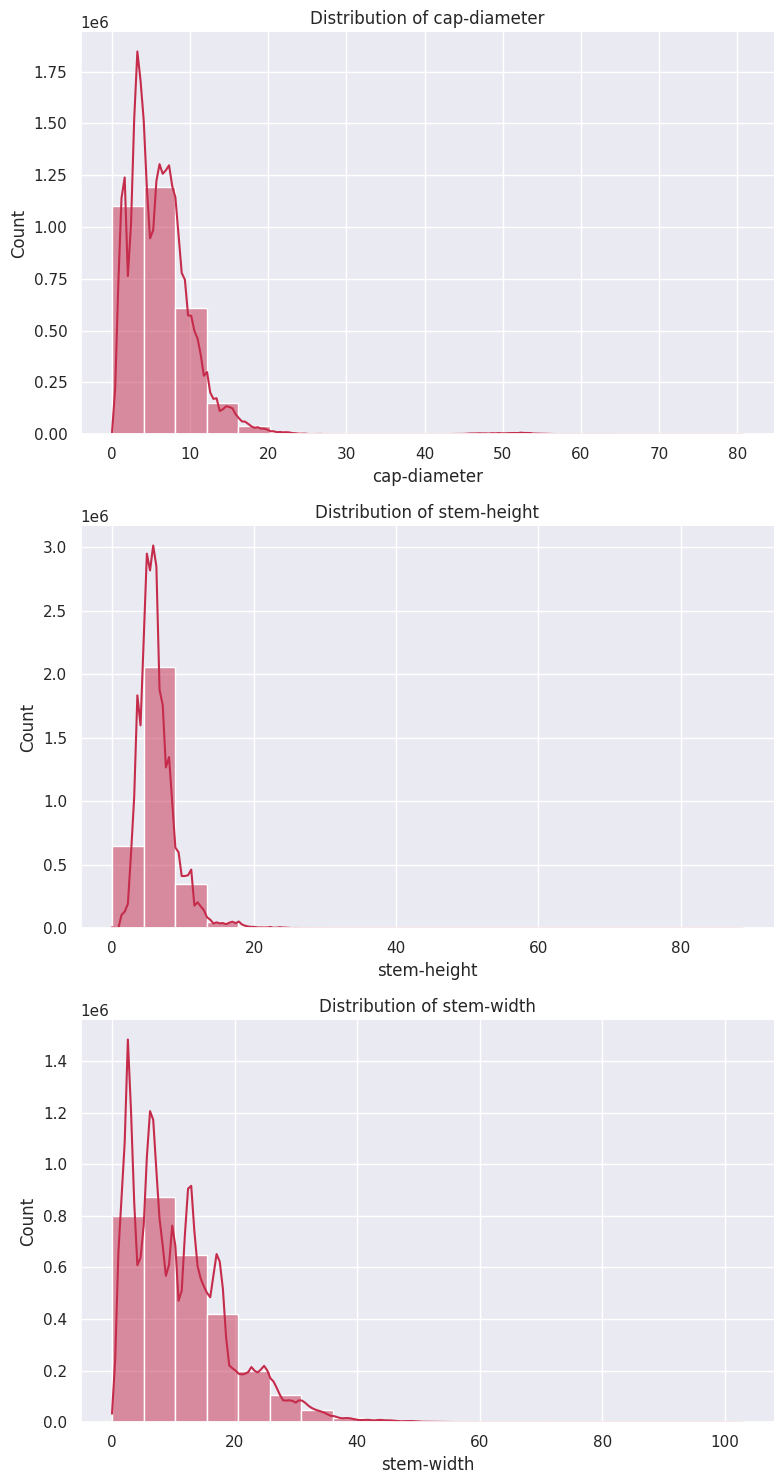

In [17]:
plt.figure(figsize=(8, 15)) 

for i, column in enumerate(numerical_columns):
    plt.subplot(3, 1, i+1)
    sns.histplot(data=df_train_cleaned, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    sns.despine()

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto;">
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        The distribution of our numerical columns is right-skewed with outliers, meaning that most values are concentrated on the left side of the distribution, but there are some unusually high values (outliers) that are far away from the rest. This suggests that our data may not be normally distributed, which could impact our analysis and modeling results.
    </ul>
</div>

<a id="cat"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:170%; font-family:Arial; background-color:#black; overflow:hidden"><b> 4.2. Distribution of Categorical Features</b></div>

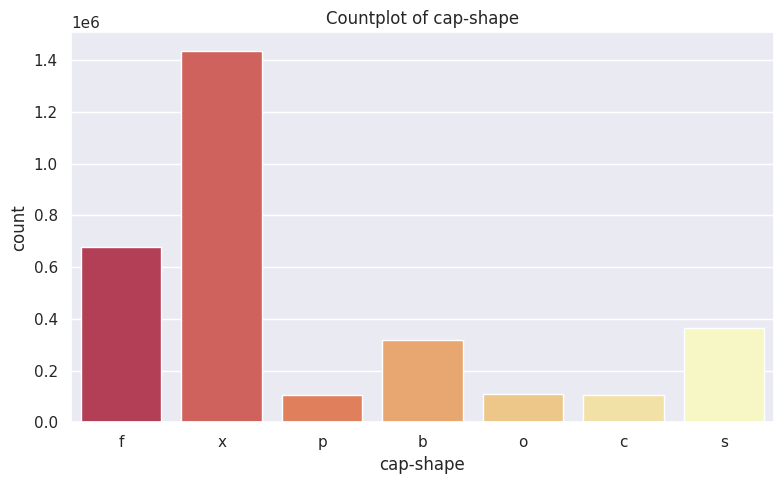

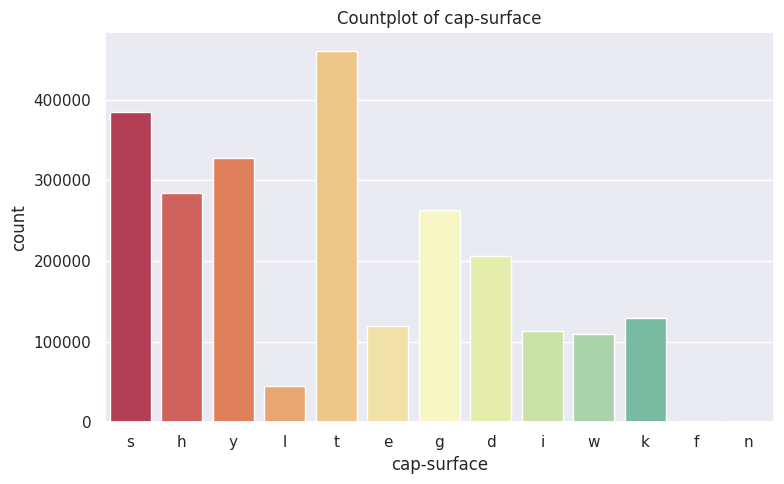

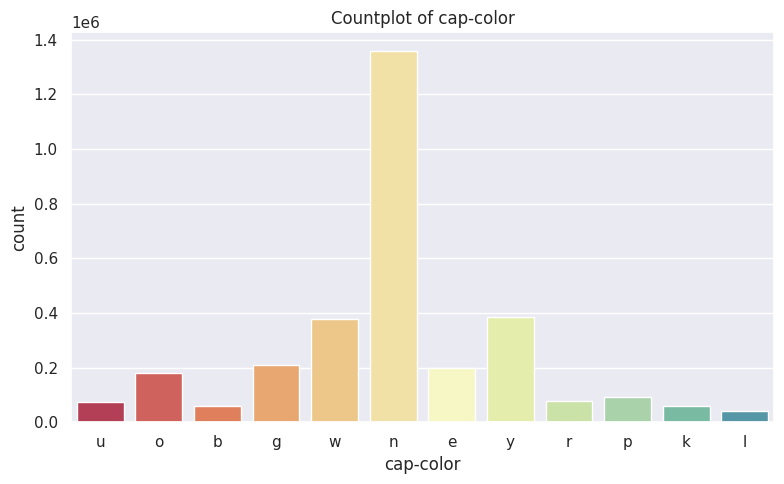

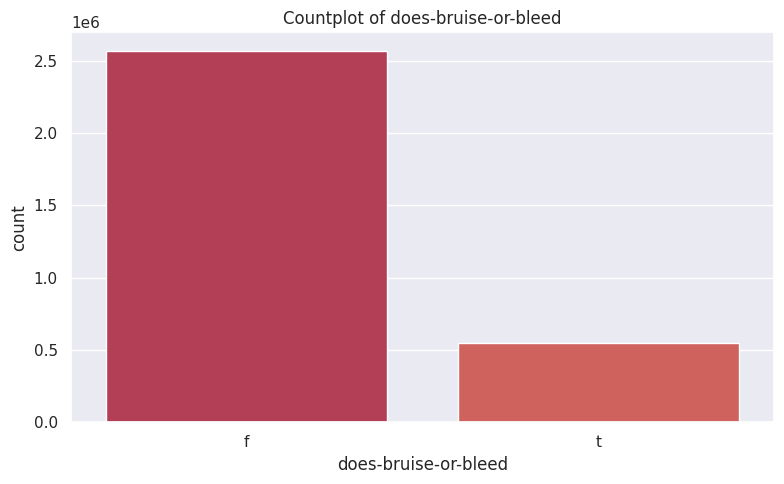

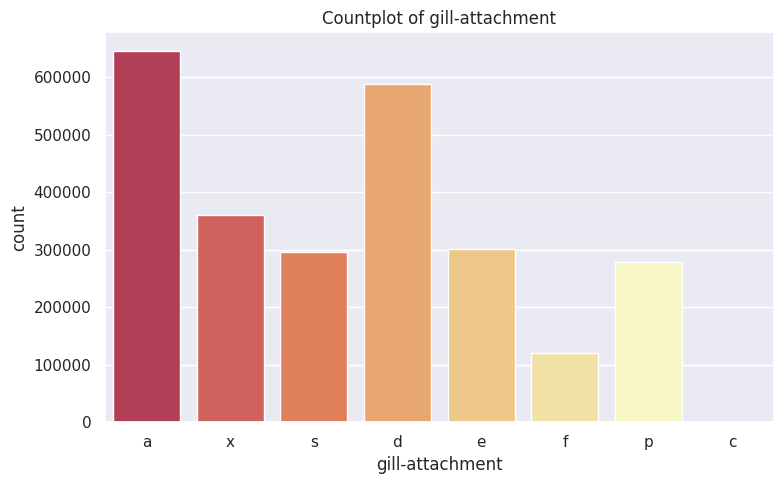

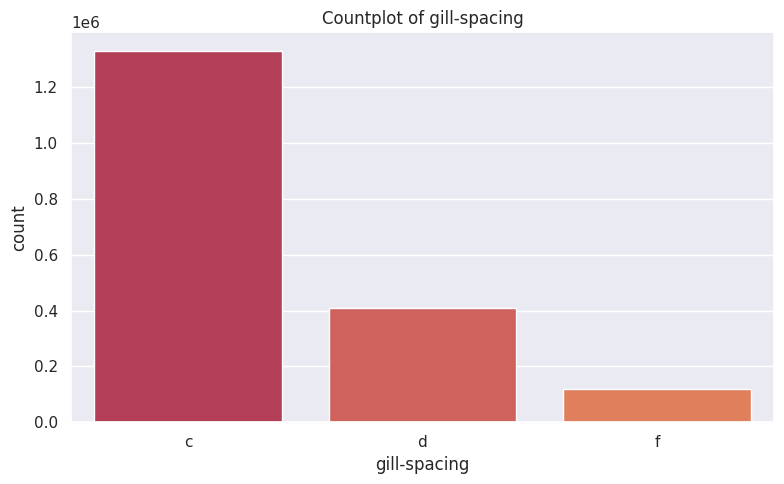

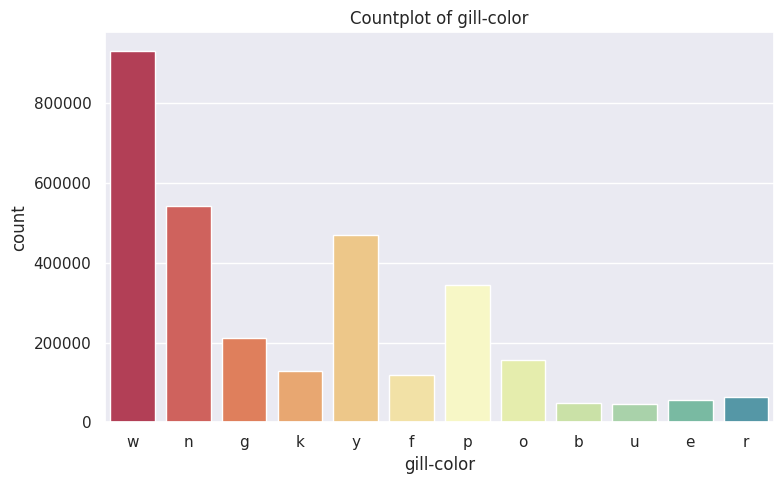

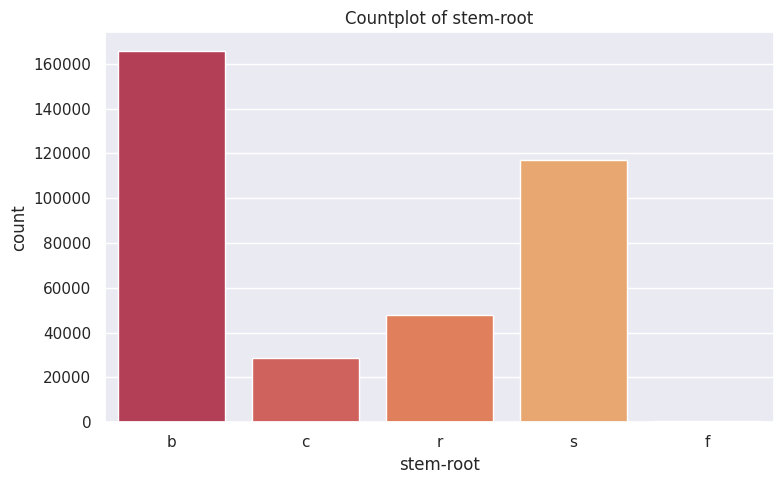

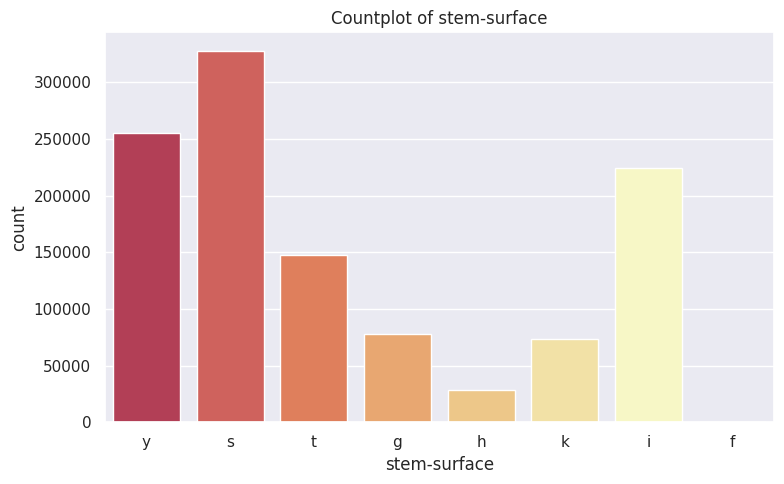

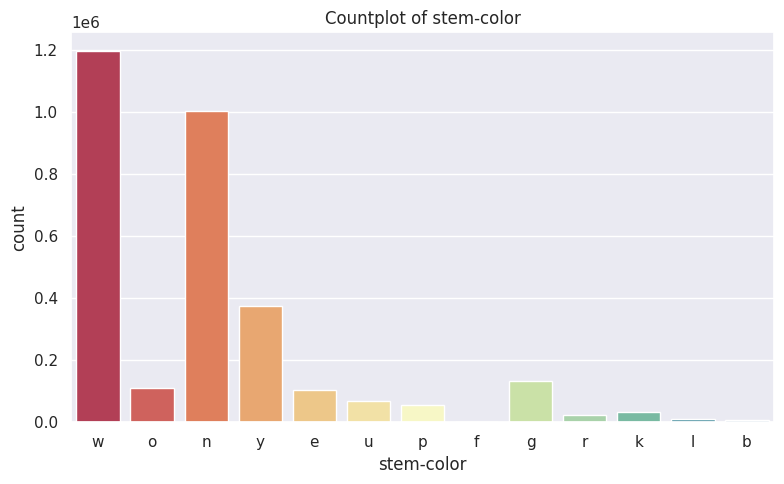

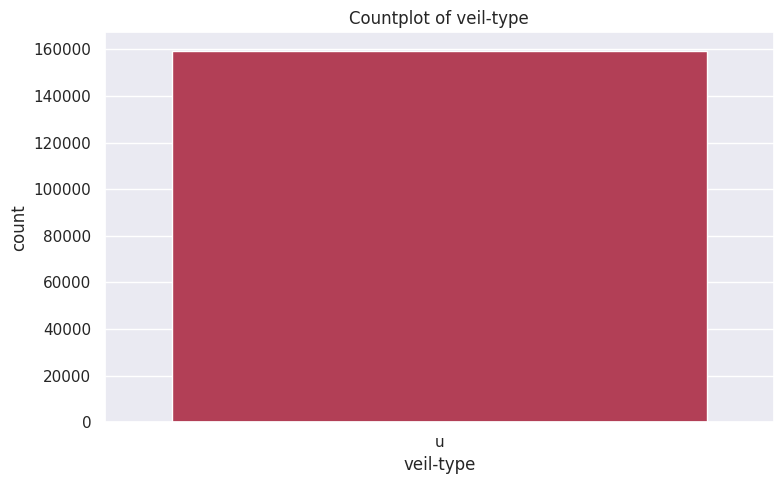

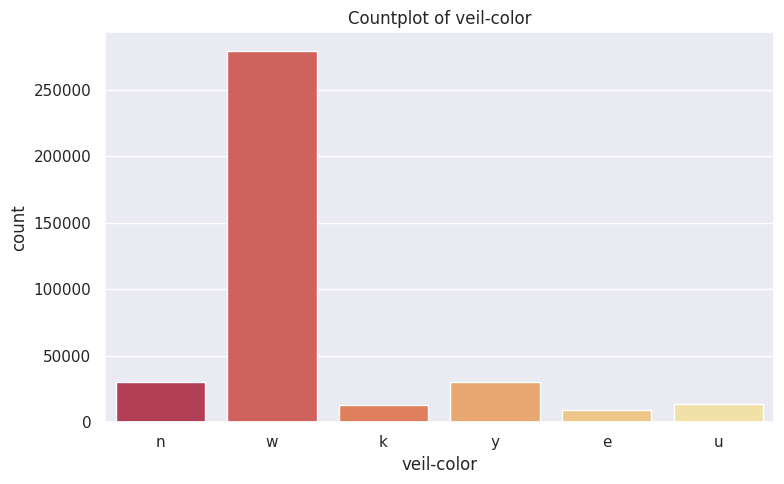

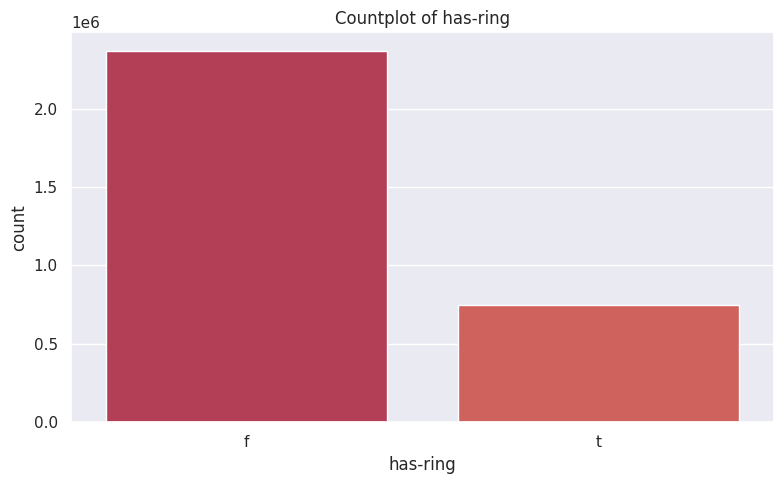

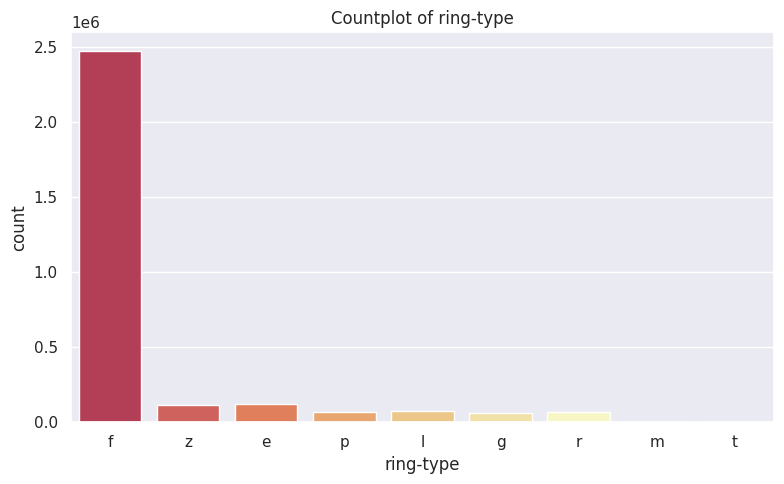

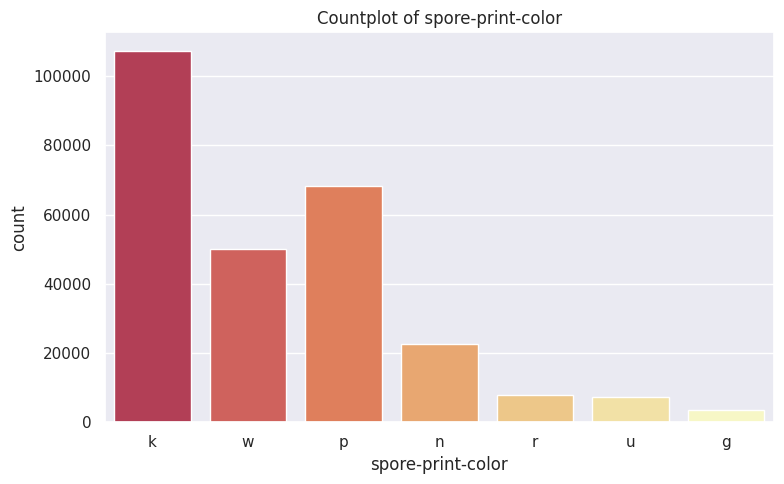

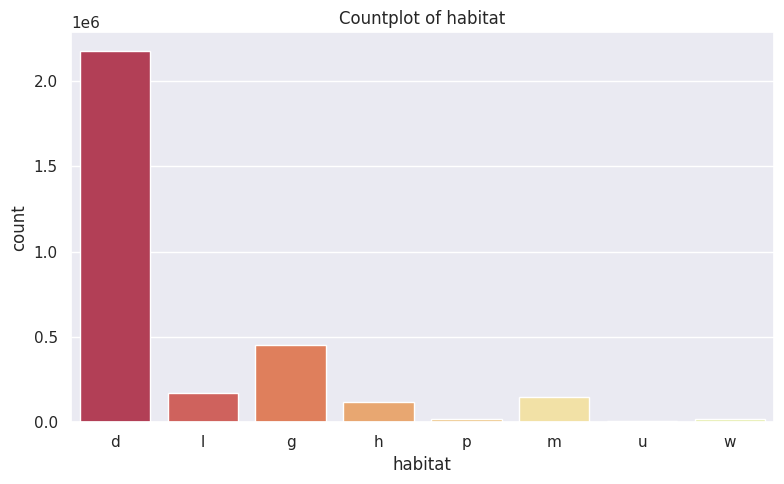

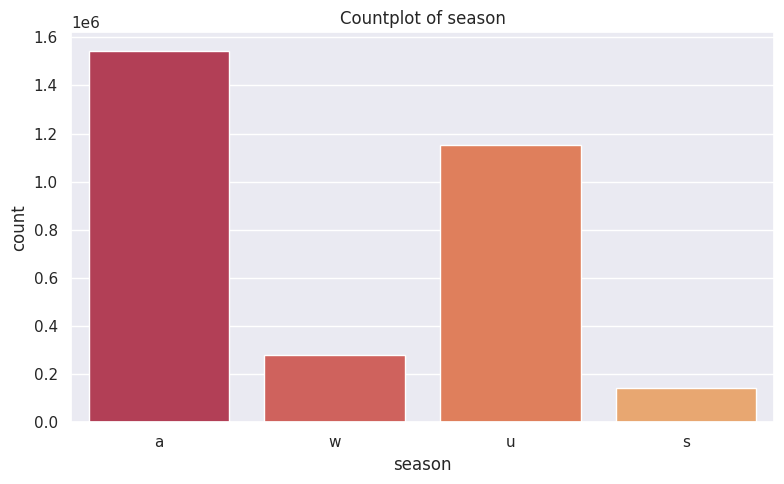

In [18]:
# Plot countplots for each categorical column, excluding "Unknown" values
for column in categorical_columns:
    # Exclude "Unknown" values from the DataFrame
    filtered_data = df_train_cleaned.loc[df_train_cleaned[column] != 'Unknown']
    
    plt.figure(figsize=(8, 5))
    sns.countplot(data=filtered_data, x=column)
    plt.title(f'Countplot of {column}')
    
    plt.tight_layout()
    plt.show()

<a id="corrnum"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:black; margin:0; font-size:170%; font-family:Arial; background-color:#black; overflow:hidden"><b> 4.3. Exploring Correlations between Numerical Features</b></div>

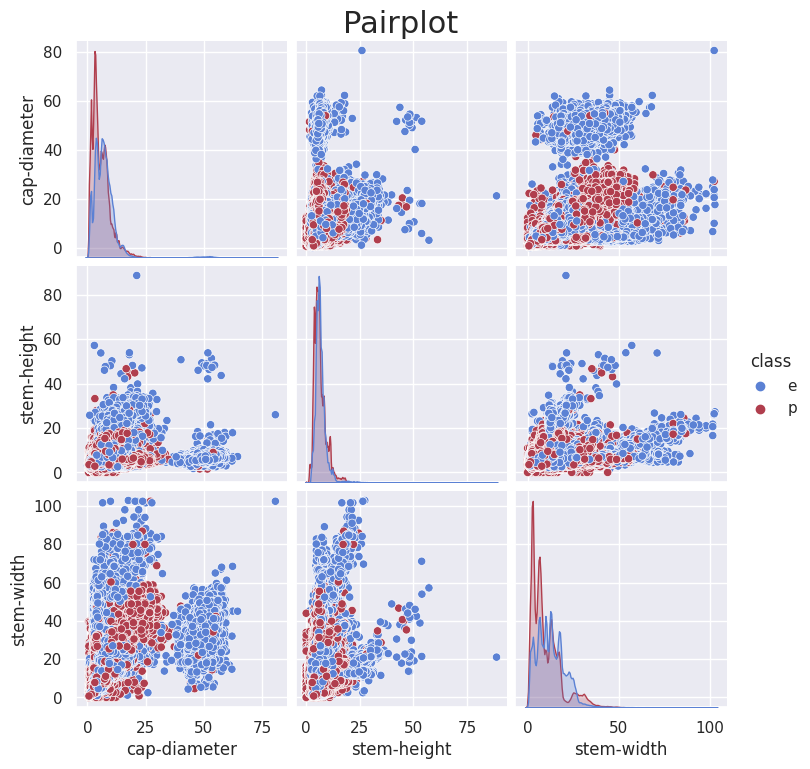

In [19]:
custom_palette = sns.color_palette(["#5b81d4", "#b03e4d"])

pairplot = sns.pairplot(df_train_cleaned, hue='class', palette=custom_palette)
pairplot.figure.suptitle('Pairplot', fontsize=22, y=1.02)
plt.show()

<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto;">
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        Notice the distinct clusters, particularly in the scatterplot of cap diameter versus stem width. Poisonous mushrooms tend to have smaller caps and narrower stems simultaneously.
    </ul>
</div>

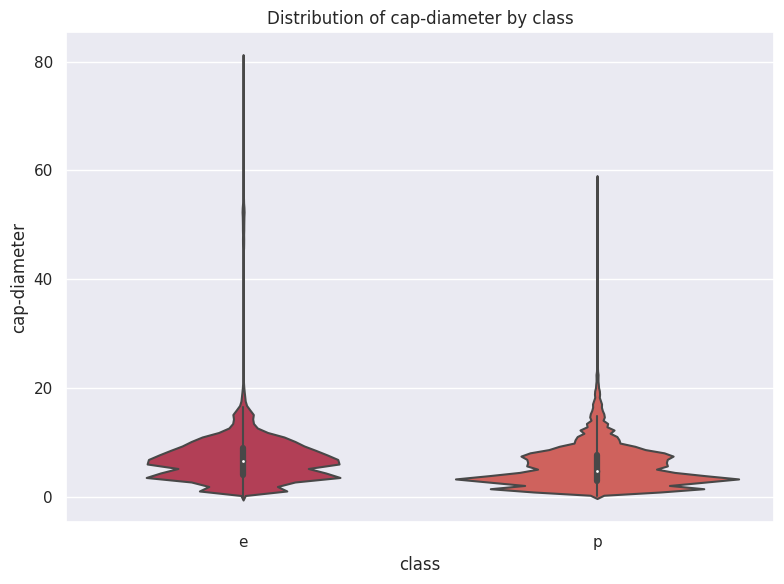

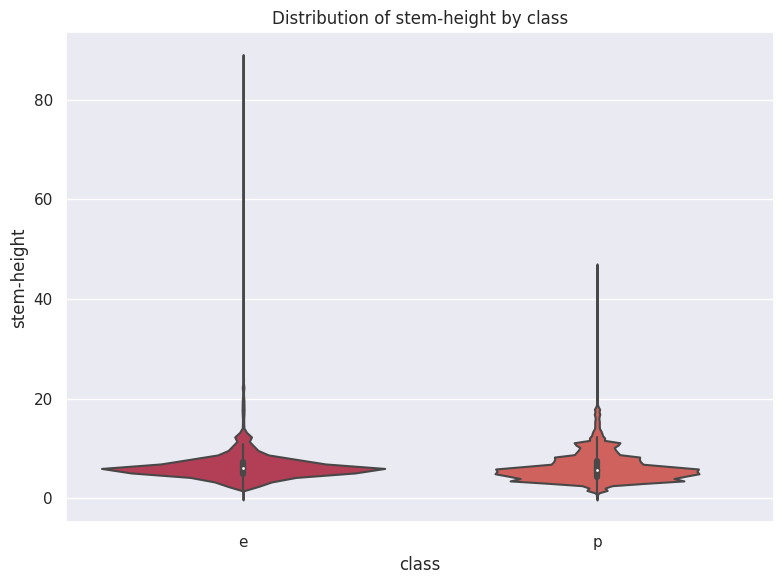

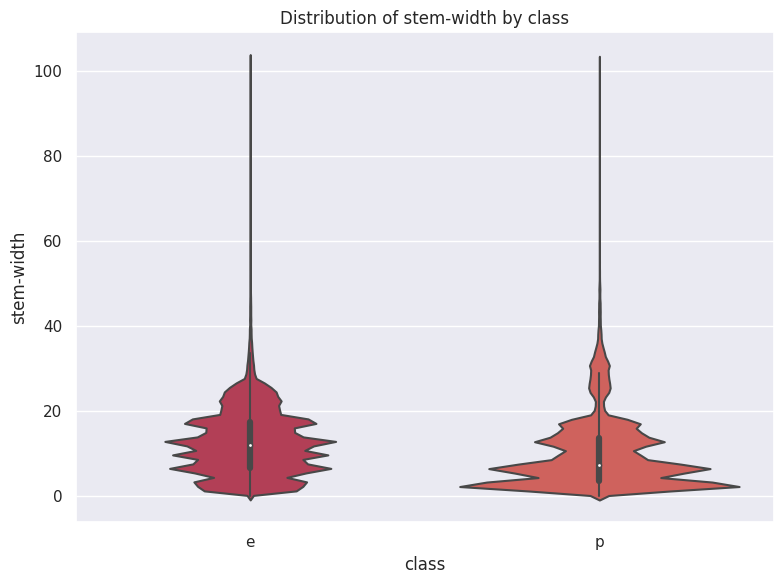

In [20]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df_train_cleaned, x='class', y=column) 
    plt.title(f'Distribution of {column} by class')

    plt.tight_layout()
    plt.show()

<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto;">
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        Violin plots with class labels show us some differences between classes and again we clearly see the presence of outliers (the long tails on each plot).
    </ul>
</div>

<a id="corrcat"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:Black; margin:0; font-size:170%; font-family:Arial; background-color:#Black; overflow:hidden"><b> 4.4. Exploring Correlations between Categorical Features</b></div>

<Figure size 800x600 with 0 Axes>

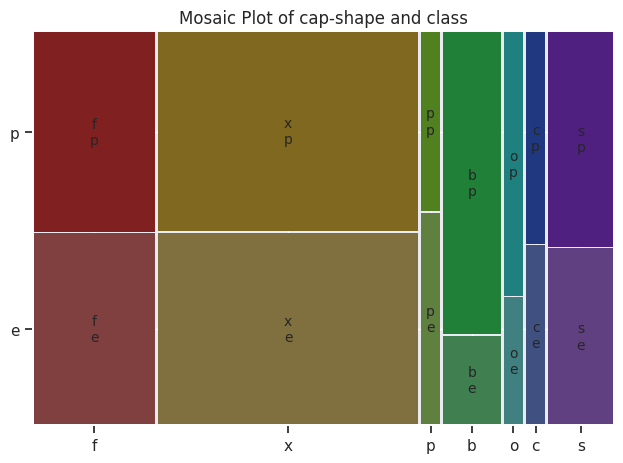

<Figure size 800x600 with 0 Axes>

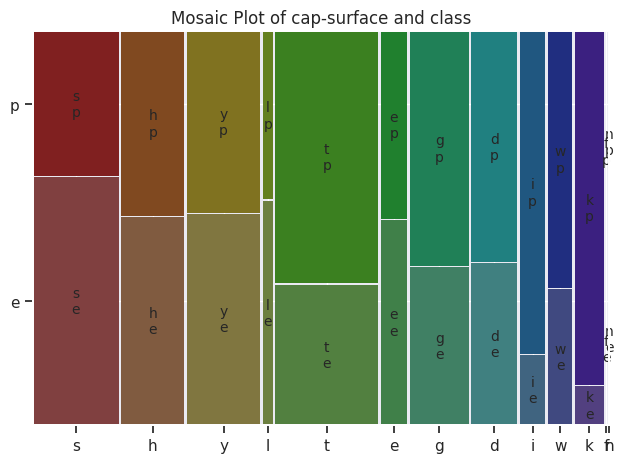

<Figure size 800x600 with 0 Axes>

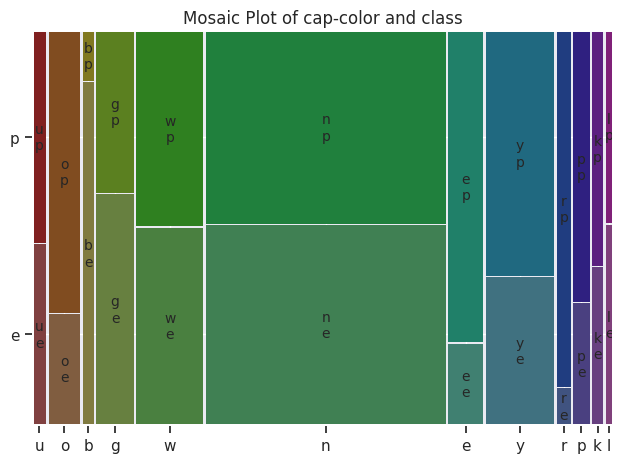

<Figure size 800x600 with 0 Axes>

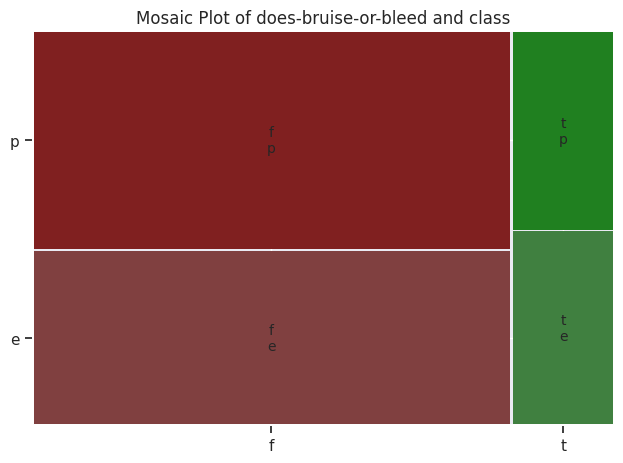

<Figure size 800x600 with 0 Axes>

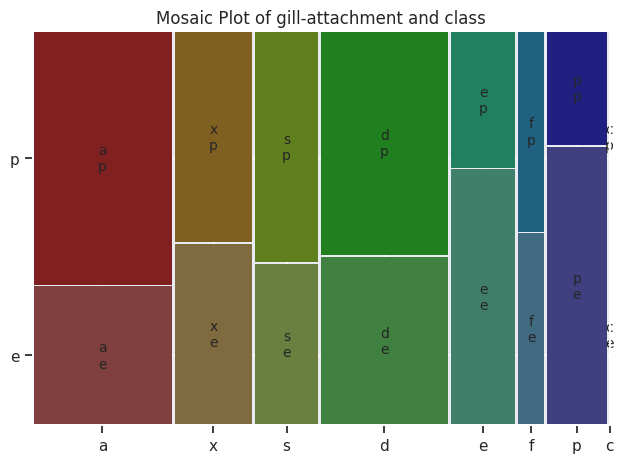

<Figure size 800x600 with 0 Axes>

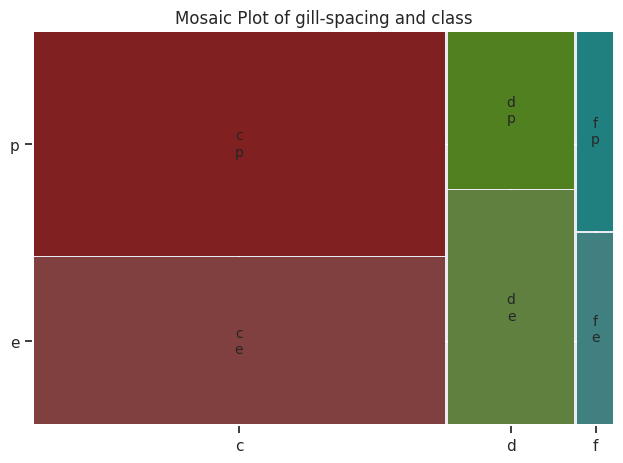

<Figure size 800x600 with 0 Axes>

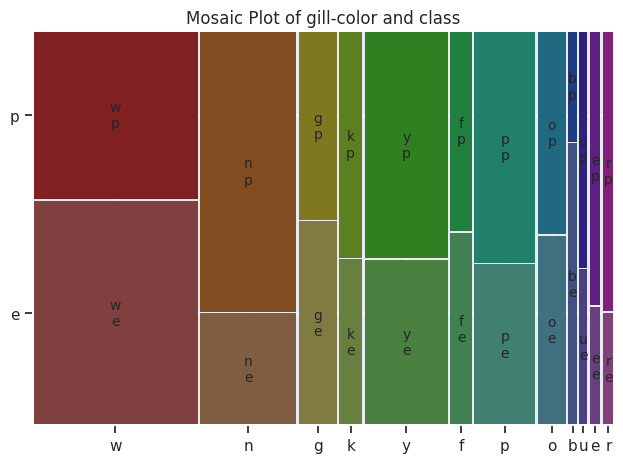

<Figure size 800x600 with 0 Axes>

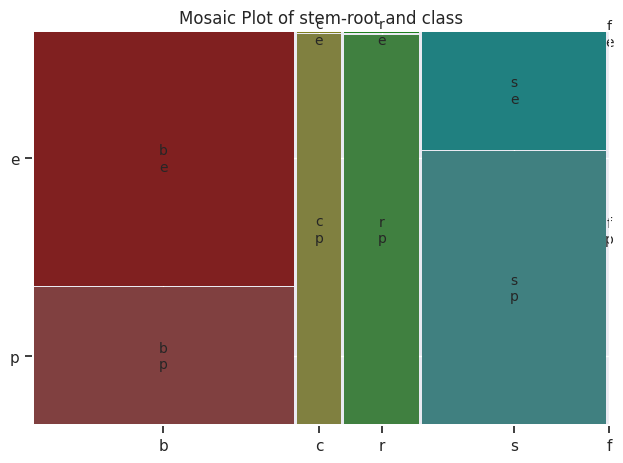

<Figure size 800x600 with 0 Axes>

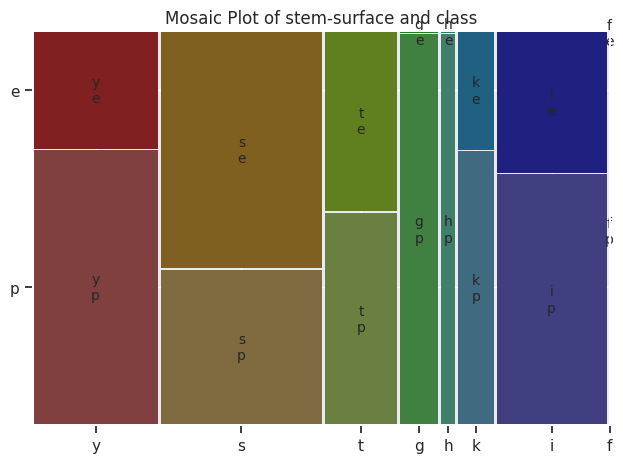

<Figure size 800x600 with 0 Axes>

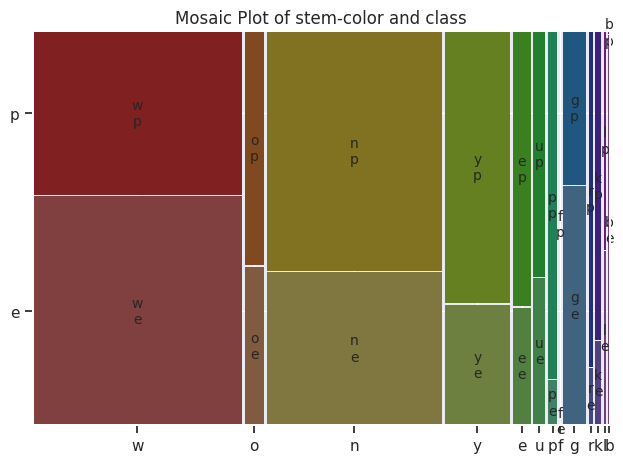

<Figure size 800x600 with 0 Axes>

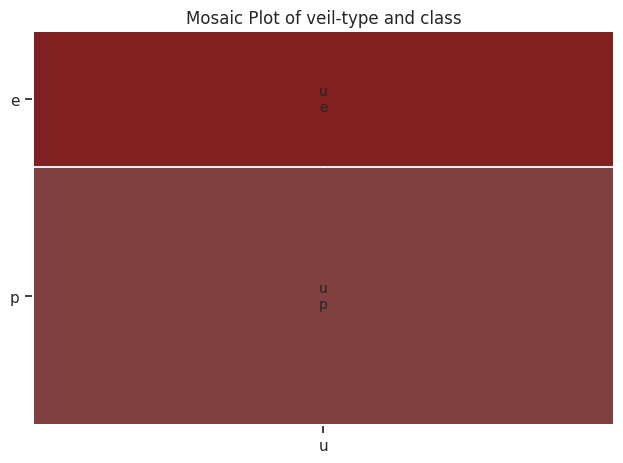

<Figure size 800x600 with 0 Axes>

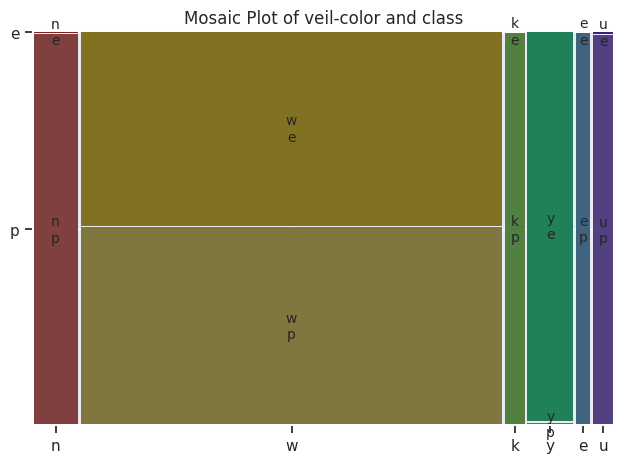

<Figure size 800x600 with 0 Axes>

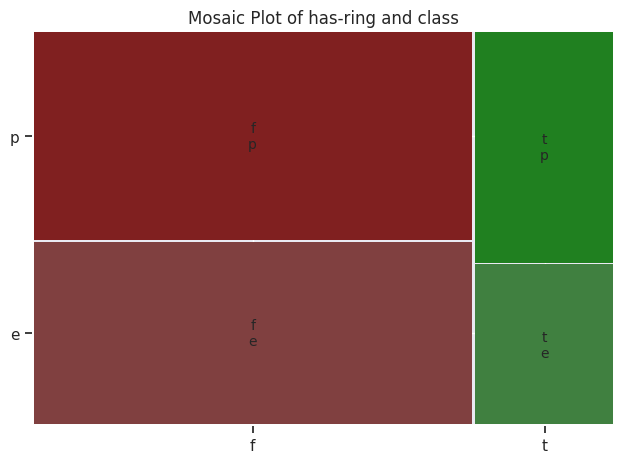

<Figure size 800x600 with 0 Axes>

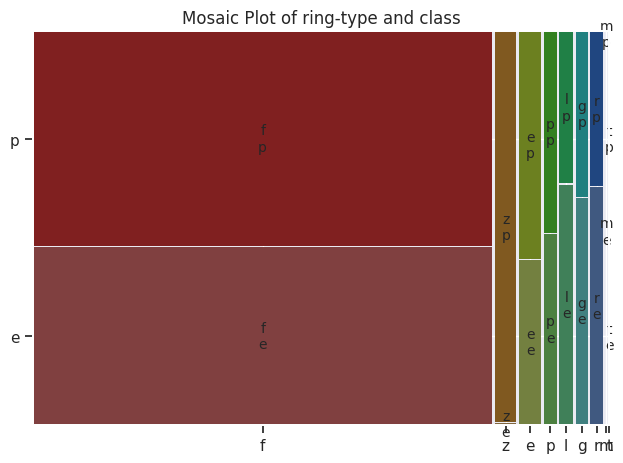

<Figure size 800x600 with 0 Axes>

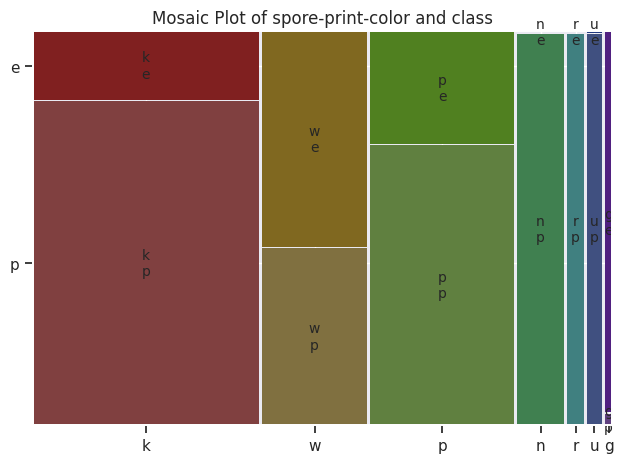

<Figure size 800x600 with 0 Axes>

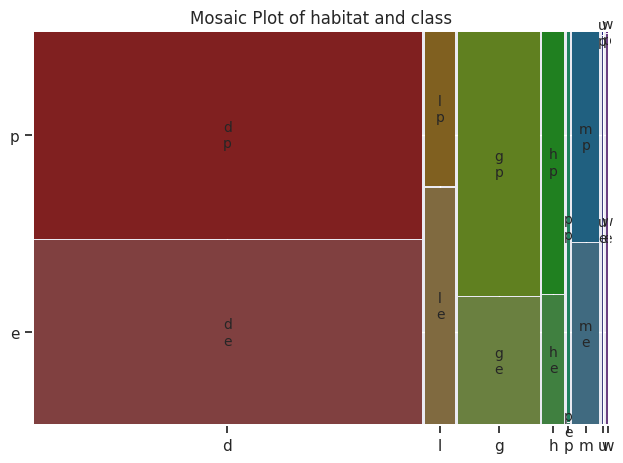

<Figure size 800x600 with 0 Axes>

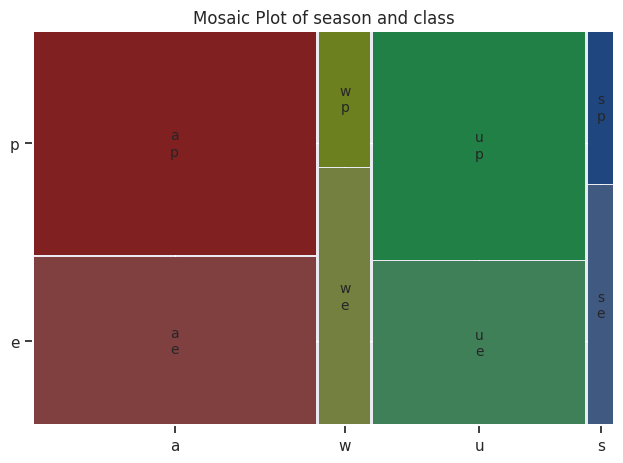

In [21]:
# Plot mosaic plots for each categorical column, excluding "Unknown" values
for column in categorical_columns:
    # Exclude "Unknown" values from the DataFrame
    filtered_data = df_train_cleaned.loc[df_train_cleaned[column] != 'Unknown']
    
    plt.figure(figsize=(8, 6))
    mosaic(filtered_data, [column, 'class'])
    plt.title(f'Mosaic Plot of {column} and class')

    plt.tight_layout()
    plt.show()

<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto;">
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        Based on the visualizations above, it is evident that edible and poisonous mushrooms have distinct characteristics. For example, edible mushrooms are more prevalent in summer and winter, whereas poisonous mushrooms are more commonly found in autumn and spring. This suggests we may be able create a precise model to predict whether a mushroom is edible based on its features.
    </ul>
</div>

<a id="outliers"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:170%; font-family:Arial; background-color:#a61d2f; overflow:hidden"><b> 4.5. Exploring Outliers</b></div>

In [22]:
# Calculate the Z-scores for the numerical columns in the DataFrame
z_scores = stats.zscore(df_train_cleaned[numerical_columns])

# Generate descriptive statistics for the Z-scores and round the results to 3 decimal places
z_scores.describe().round(3)

,cap-diameter,stem-height,stem-width
count,3116943.000,3116943.000,3116943.000
mean,0.000,0.000,0.000
std,1.000,1.000,1.000
min,-1.348,-2.351,-1.378
25%,-0.642,-0.622,-0.764
50%,-0.120,-0.173,-0.186
75%,0.414,0.393,0.553
max,15.964,30.511,11.333


<div style="padding: 20px; border-color: #a61d2f; border-radius: 0px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #a61d2f; width: 75%; margin: 0 auto;">
    <ul style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
        From the Z-scores and Violin plots visualized eariler, you can observe the presence of outliers in all three numerical columns. Specifically, the Z-scores of 15, 30, and 11 are significantly high, indicating that these values are far from the mean and lie outside the expected range of data. Such high Z-scores suggest that the corresponding data points are extreme outliers, which could potentially skew the analysis and interpretation of the data. There are various methods for removing outliers. The method we chose to use is Isolation Forest (during Data Prerocessing).
    </ul> 
</div>

<a id="target"></a>
<div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:170%; font-family:Arial; background-color:#a61d2f; overflow:hidden"><b> 4.6. Distribution of a Target Variable</b></div>

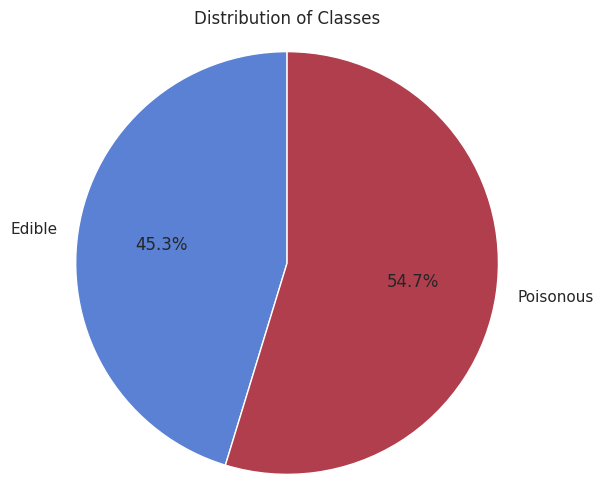

In [23]:
# Calculate counts for the pie chart and add labels
class_counts = df_train_cleaned['class'].value_counts().sort_index()
labels = ["Edible", "Poisonous"]

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, colors=custom_palette,
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<a id="ml"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#cc263b; overflow:hidden"><b> 5. Machine Learning </b></div>

In [24]:
# Step 1: Encode the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df_train_cleaned['class'])

# Step 2: Convert categorical columns to 'category' dtype
df_train_cleaned[categorical_columns] = df_train_cleaned[categorical_columns].astype('category')
df_test_cleaned[categorical_columns] = df_test_cleaned[categorical_columns].astype('category')

# Step 3: Define the preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('convert_to_float32', FunctionTransformer(lambda x: x.astype(np.float32)))
])

categorical_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(dtype=np.int32, handle_unknown='use_encoded_value', unknown_value=-1))
])

# Step 4: Combine the numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

# Step 5: Apply the transformations to the training and test sets
X_train_preprocessed = preprocessor.fit_transform(df_train_cleaned)
df_test_preprocessed = preprocessor.transform(df_test_cleaned)

# Step 6: Apply Isolation Forest for outlier detection on the training data
isolation_forest = IsolationForest(contamination=0.024, random_state=rs)
outlier_labels = isolation_forest.fit_predict(X_train_preprocessed)

# Step 7: Filter out outliers from both X_train_preprocessed and y_train
non_outliers_mask = outlier_labels != -1
X_train_preprocessed = X_train_preprocessed[non_outliers_mask]
y_train = y_train[non_outliers_mask]

```python
# Step 8: Define the Optuna objective function
def objective(trial):
    params = {
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'device': 'cuda'  # Enable GPU acceleration
    }

    xgb_model = XGBClassifier(**params)

    # Perform cross-validation using StratifiedKFold and calculate the mean MCC
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)
    mcc = cross_val_score(xgb_model, X_train_preprocessed, y_train, cv=skf, scoring='matthews_corrcoef').mean()

    return mcc

# Step 9: Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=150)

print("Best trial parameters:", study.best_trial.params)
print("Best Matthews Correlation Coefficient:", study.best_value)

# Retrieve the best parameters from the Optuna study
best_params = study.best_params

# Update the parameters with device set to 'cuda' if you're using GPU
best_params['device'] = 'cuda'

# Train the final model on the entire training set
final_model = XGBClassifier(**best_params, use_label_encoder=False, random_state=rs)
final_model.fit(X_train_preprocessed, y_train)
```

Best trial parameters: {'colsample_bytree': 0.4091102963667067, 'learning_rate': 0.02607643917334148, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 460, 'subsample': 0.8358683894107812, 'gamma': 0.40339744356140006, 'reg_lambda': 0.133022542287587}

Best Matthews Correlation Coefficient: 0.9847298485681781

In [25]:
best_params = {
    'colsample_bytree': 0.43786552283911356, 
    'learning_rate': 0.027640232910206706, 
    'max_depth': 15, 
    'min_child_weight': 8, 
    'n_estimators': 456, 
    'subsample': 0.9379640997273687}


final_model = XGBClassifier(**best_params, use_label_encoder=False, random_state=rs)
final_model.fit(X_train_preprocessed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.43786552283911356, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.027640232910206706,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=456, n_jobs=None,
              num_parallel_tree=None, random_state=58, ...)

<a id="sub"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:7px; color:white; margin:0; font-size:110%; font-family:Arial; background-color:#cc263b; overflow:hidden"><b> 6. Predictions and Submission </b></div>

In [26]:
test_preds = final_model.predict(df_test_preprocessed)
test_preds = label_encoder.inverse_transform(test_preds)

In [27]:
output = pd.DataFrame({'id': df_test['id'],
                       'class': test_preds})

output.to_csv('submission.csv', index=False)

output.head()

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
